In [1]:
# TRIAL: time series analysis done including COVID-19 data from 2020 and 2021, 
# to check if the model still forecast appropriately the long term trend or get confused by the recent big drop.
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('prova.xlsx')
data.shape

(362, 2)

In [3]:
data.head()

,YYYY-MM,Total passengers
0,1991-01,512773.632
1,1991-02,528797.808
2,1991-03,632954.952
3,1991-04,648979.128
4,1991-05,705063.744


In [4]:
data['YYYY-MM'] = pd.to_datetime(data['YYYY-MM'], infer_datetime_format=True)
data = data.set_index(['YYYY-MM'])
print(data.head())
print(data.tail())

            Total passengers
YYYY-MM                     
1991-01-01        512773.632
1991-02-01        528797.808
1991-03-01        632954.952
1991-04-01        648979.128
1991-05-01        705063.744
            Total passengers
YYYY-MM                     
2020-10-01          580550.0
2020-11-01          212325.0
2020-12-01          263941.0
2021-01-01          206071.0
2021-02-01          146945.0


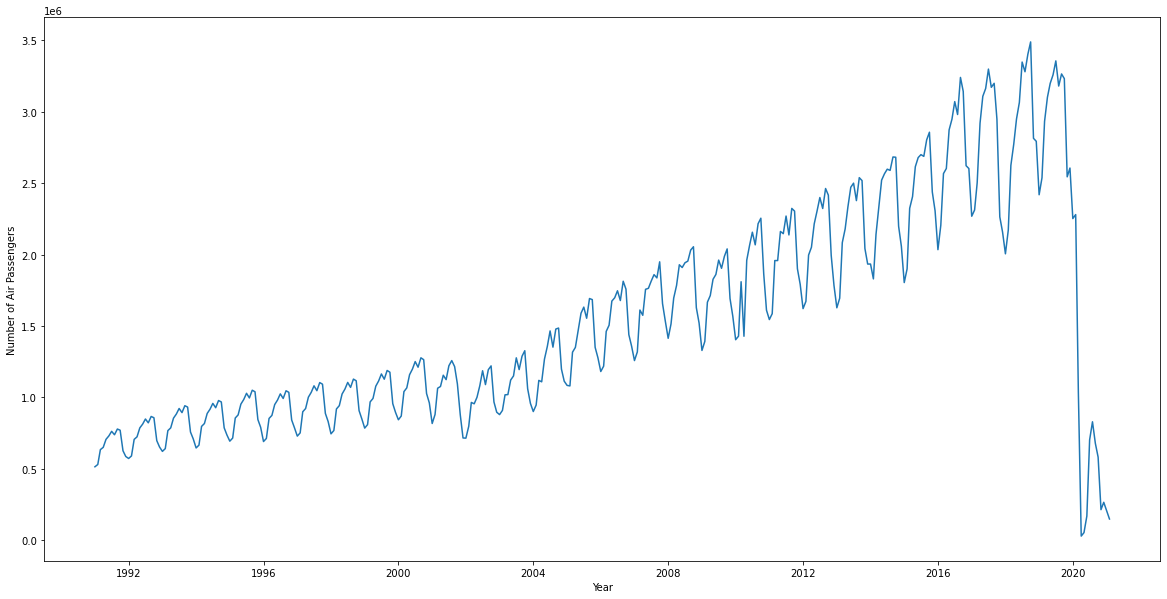

In [5]:
plt.figure(figsize=(20,10))
plt.xlabel("Year")
plt.ylabel("Number of Air Passengers")
plt.plot(data)
plt.show()

In [6]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

            Total passengers
YYYY-MM                     
1991-01-01               NaN
1991-02-01               NaN
1991-03-01               NaN
1991-04-01               NaN
1991-05-01               NaN
1991-06-01               NaN
1991-07-01               NaN
1991-08-01               NaN
1991-09-01               NaN
1991-10-01               NaN
1991-11-01               NaN
1991-12-01     667674.000000
1992-01-01     672518.506667
1992-02-01     677514.404167
1992-03-01     683494.342083
            Total passengers
YYYY-MM                     
1991-01-01               NaN
1991-02-01               NaN
1991-03-01               NaN
1991-04-01               NaN
1991-05-01               NaN
1991-06-01               NaN
1991-07-01               NaN
1991-08-01               NaN
1991-09-01               NaN
1991-10-01               NaN
1991-11-01               NaN
1991-12-01      92704.666631
1992-01-01      85079.463880
1992-02-01      77275.140503
1992-03-01      76283.615150


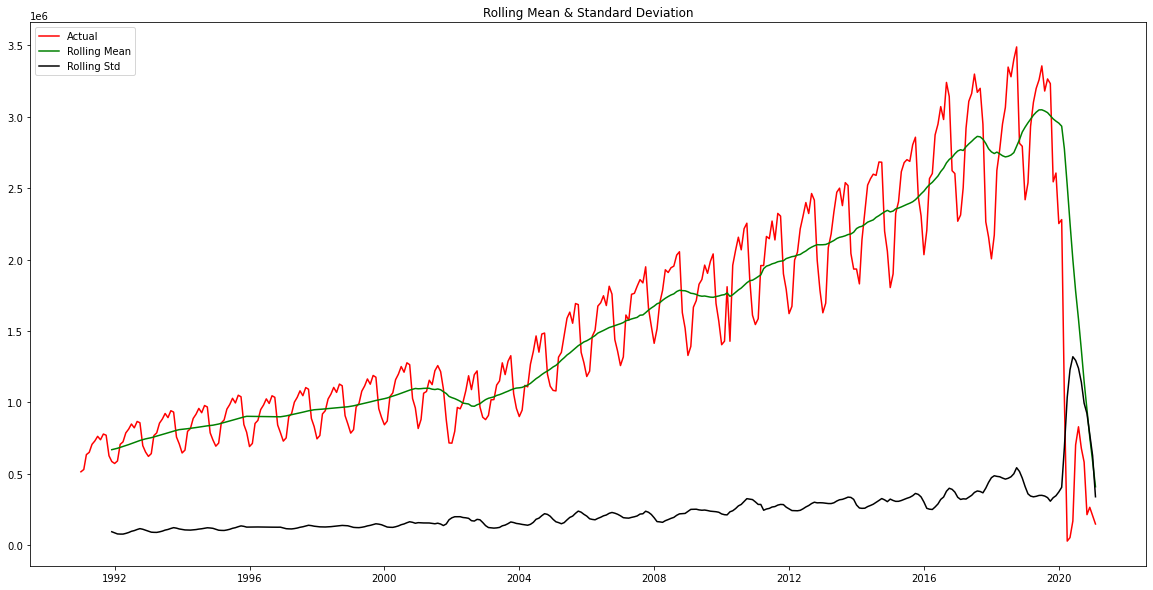

In [7]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [8]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['Total passengers'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           -2.254330
p-value                   0.187121
Lags Used                16.000000
No. of Obs              345.000000
Critical Value (1%)      -3.449447
Critical Value (5%)      -2.869954
Critical Value (10%)     -2.571253
dtype: float64


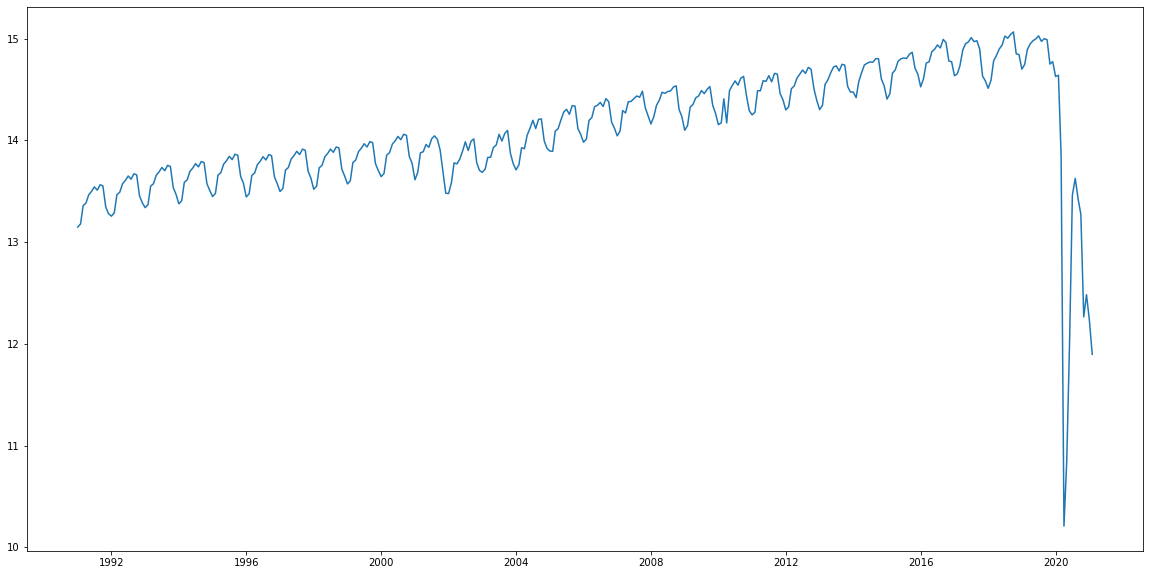

In [9]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)
plt.show()

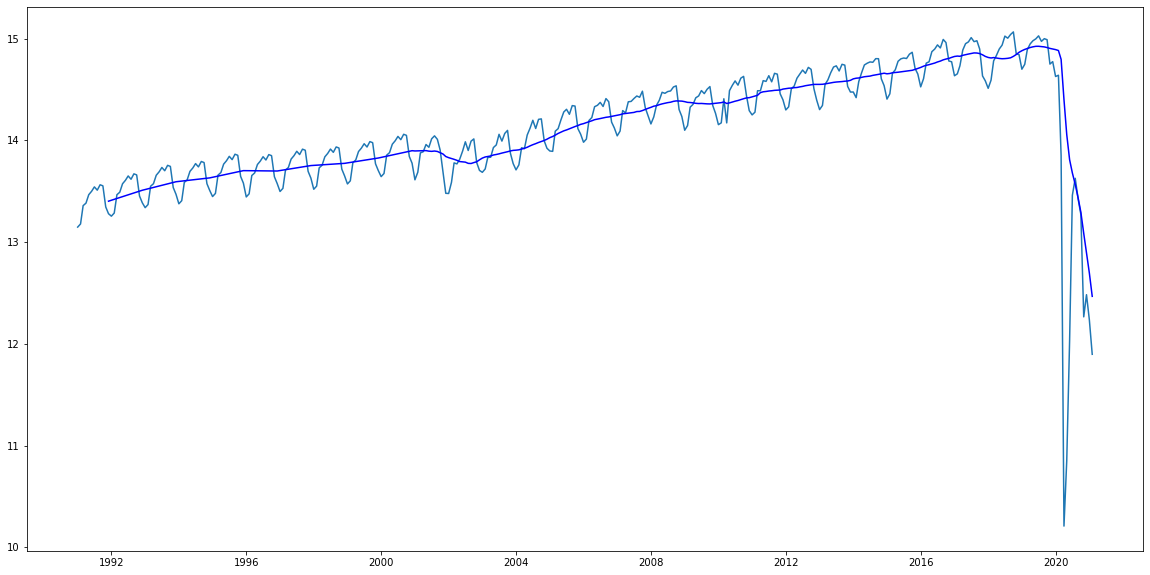

In [10]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')
plt.show()

In [11]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

,Total passengers
YYYY-MM,
1991-01-01,NaN
1991-02-01,NaN
1991-03-01,NaN
1991-04-01,NaN
1991-05-01,NaN
1991-06-01,NaN
1991-07-01,NaN
1991-08-01,NaN
1991-09-01,NaN


In [12]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,Total passengers
YYYY-MM,
1991-12-01,-0.123084
1992-01-01,-0.156217
1992-02-01,-0.134395
1992-03-01,0.036449
1992-04-01,0.052501


In [13]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['Total passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

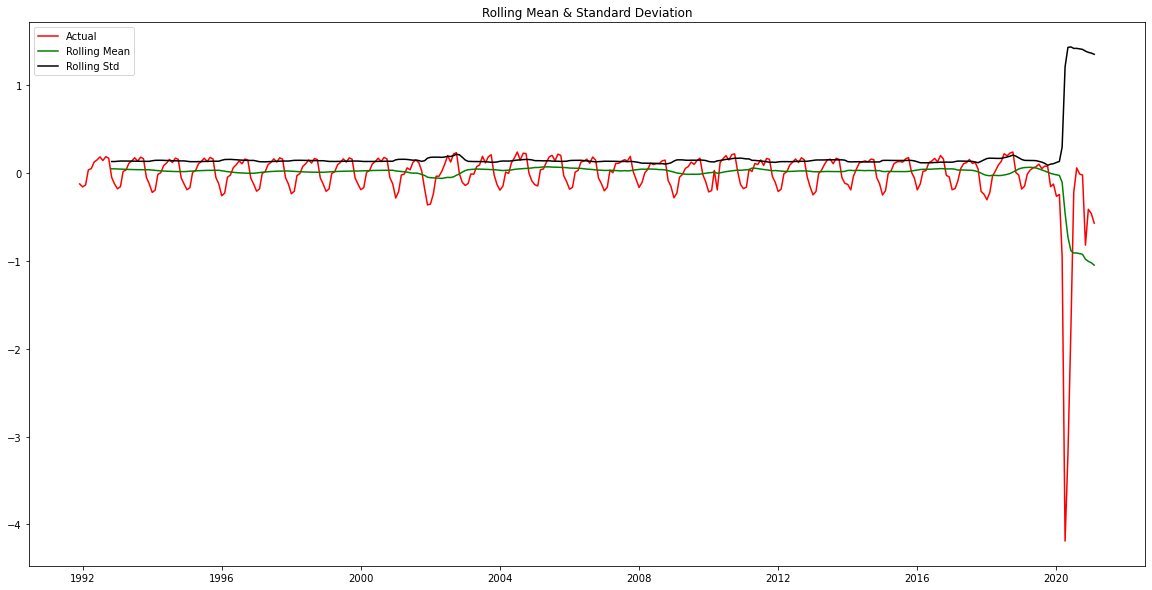

Dickey-Fuller Test: 
Test Statistic           -1.321834
p-value                   0.619125
Lags Used                17.000000
No. of Obs              333.000000
Critical Value (1%)      -3.450141
Critical Value (5%)      -2.870259
Critical Value (10%)     -2.571415
dtype: float64


In [14]:
stationarity(data_log_diff)

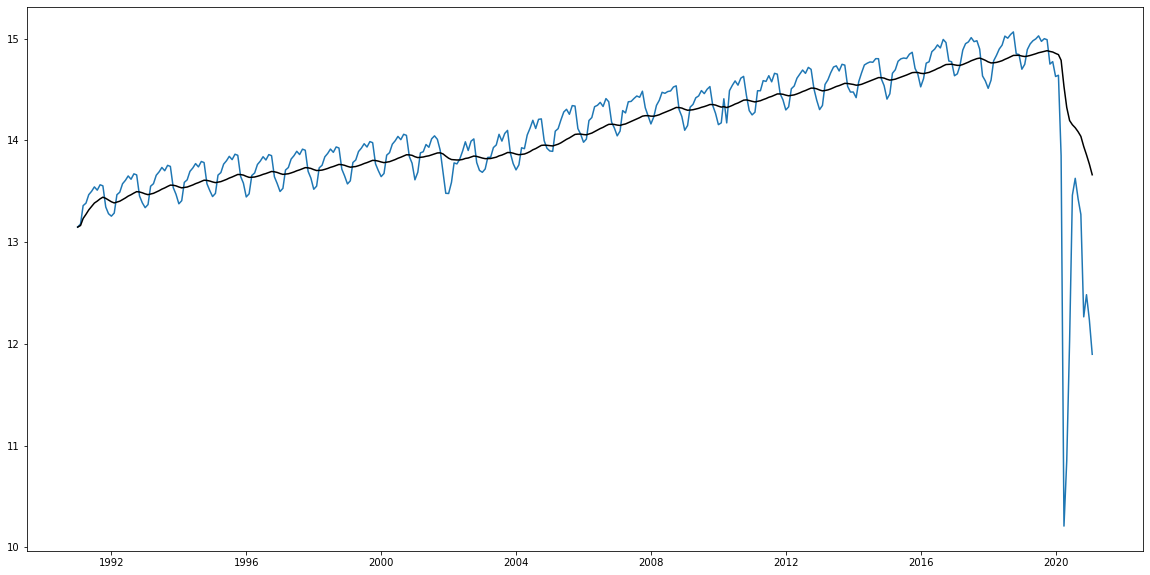

In [15]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')
plt.show()

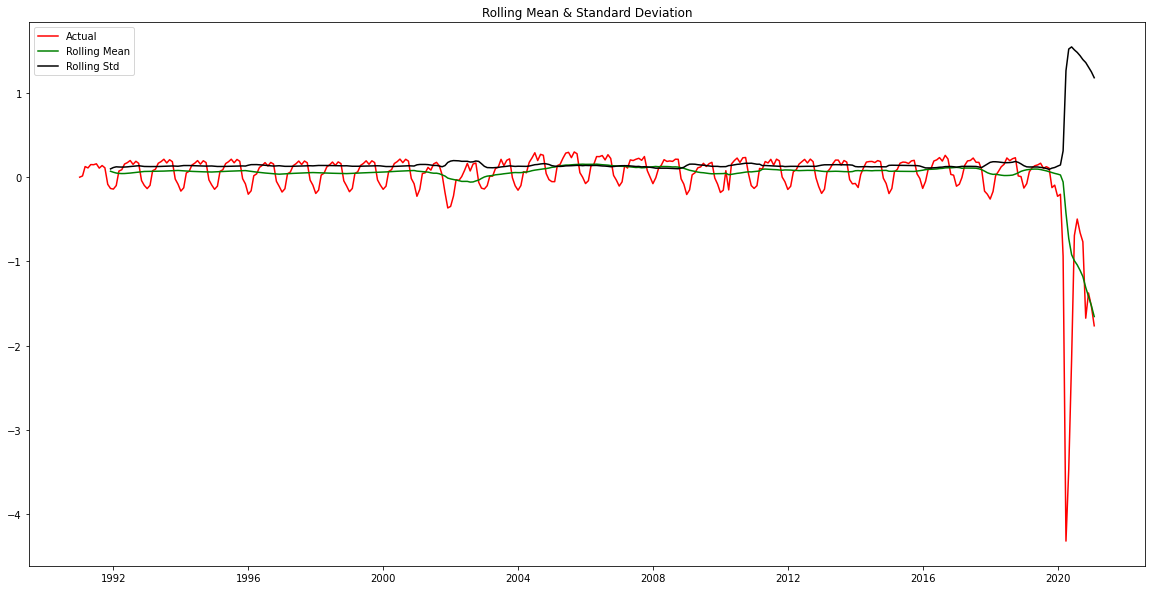

Dickey-Fuller Test: 
Test Statistic           -0.388294
p-value                   0.912035
Lags Used                17.000000
No. of Obs              344.000000
Critical Value (1%)      -3.449503
Critical Value (5%)      -2.869979
Critical Value (10%)     -2.571266
dtype: float64


In [16]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

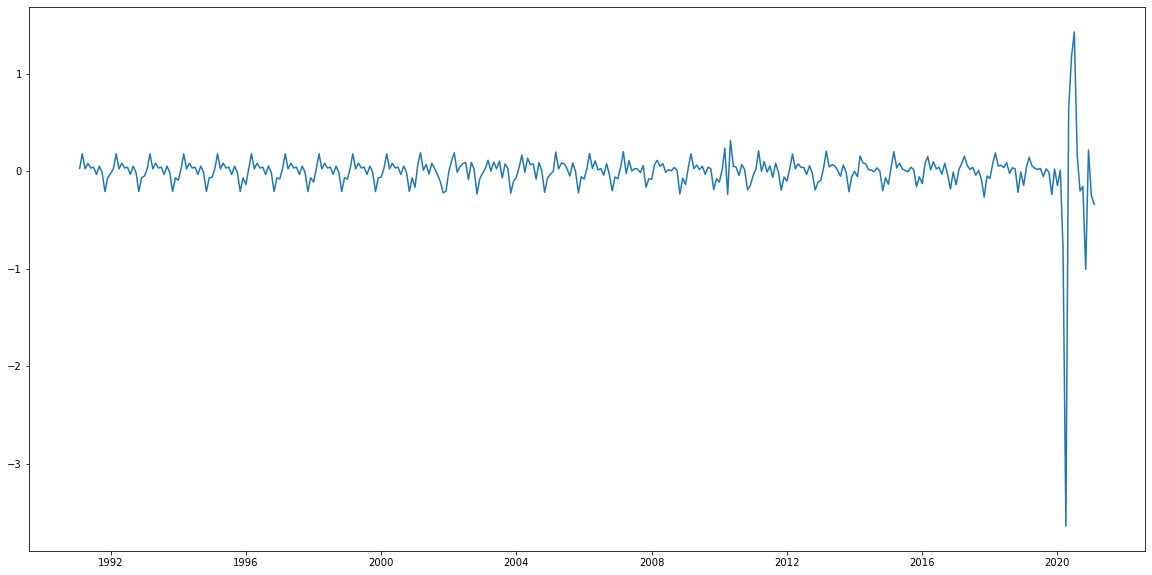

In [17]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)
plt.show()

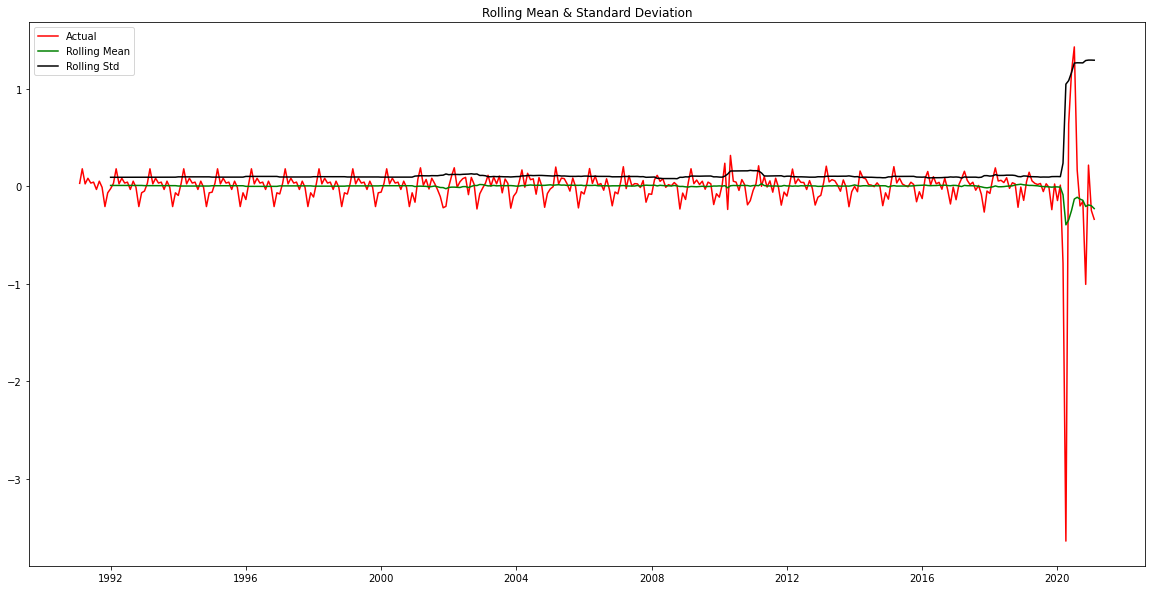

Dickey-Fuller Test: 
Test Statistic            0.403953
p-value                   0.981642
Lags Used                16.000000
No. of Obs              344.000000
Critical Value (1%)      -3.449503
Critical Value (5%)      -2.869979
Critical Value (10%)     -2.571266
dtype: float64


In [18]:
data_shift=data_shift.dropna()
stationarity(data_shift)

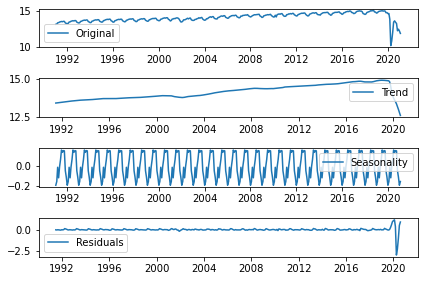

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

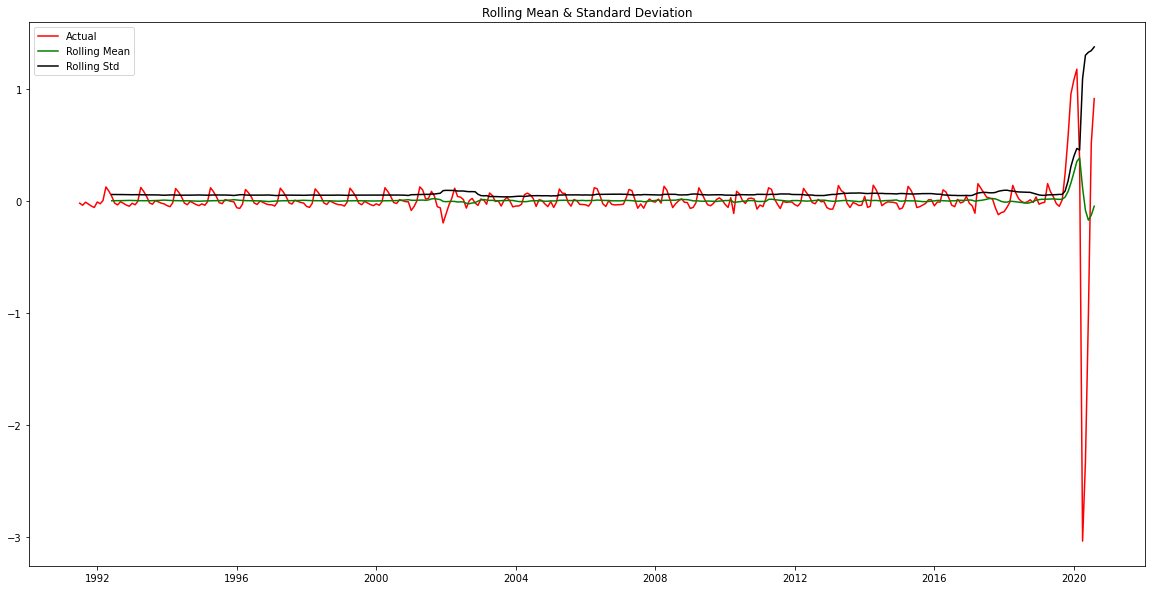

Dickey-Fuller Test: 


KeyError: 'Total passengers'

In [20]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

Text(0.5, 1.0, 'Partial Autocorrelation Function')

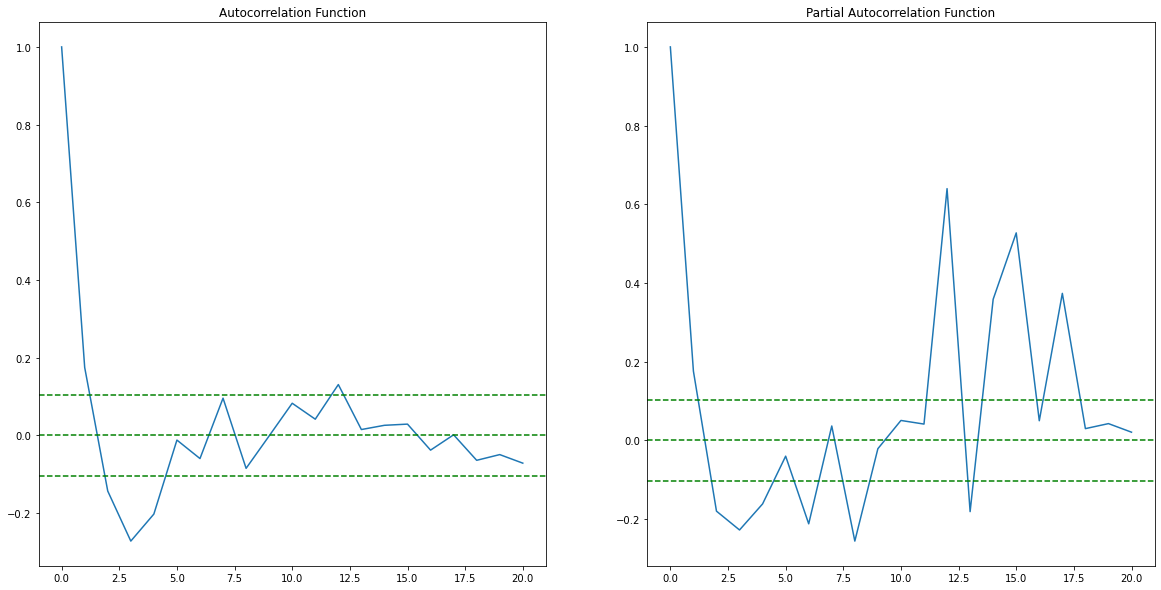

In [21]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


plotting ARIMA model


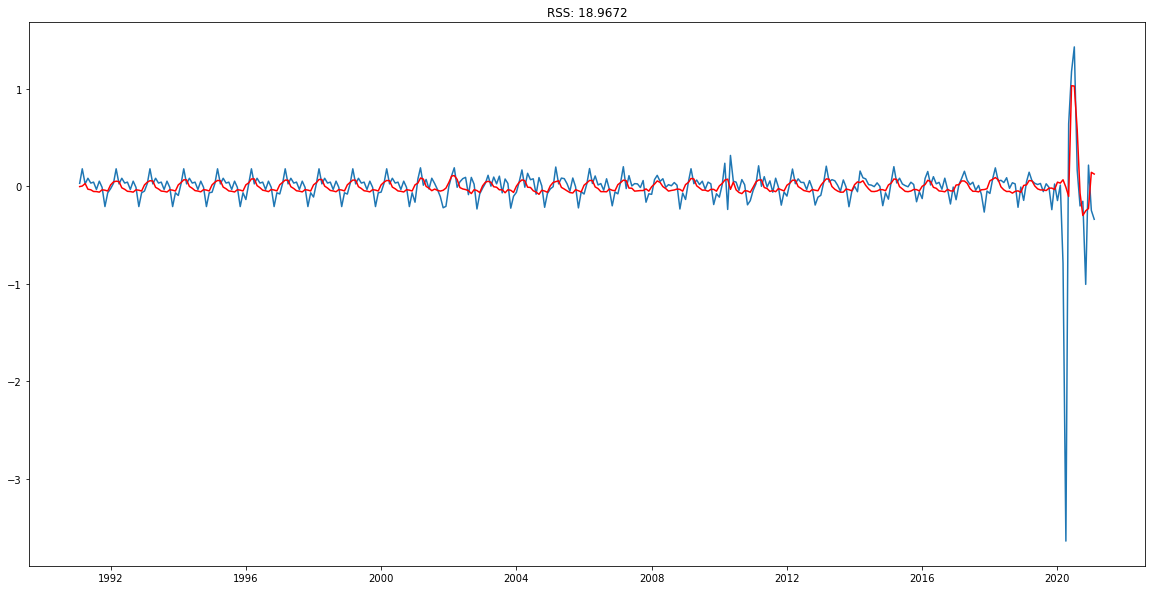

In [22]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['Total passengers'])**2))
print('plotting ARIMA model')

In [23]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

YYYY-MM
1991-02-01   -0.002560
1991-03-01    0.003203
1991-04-01    0.028648
1991-05-01   -0.029557
1991-06-01   -0.035492
dtype: float64


In [24]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

YYYY-MM
1991-02-01   -0.002560
1991-03-01    0.000643
1991-04-01    0.029290
1991-05-01   -0.000266
1991-06-01   -0.035758
dtype: float64


In [25]:
predictions_log=pd.Series(data_log['Total passengers'][0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

YYYY-MM
1991-01-01    13.147590
1991-02-01    13.145030
1991-03-01    13.148232
1991-04-01    13.176880
1991-05-01    13.147323
dtype: float64

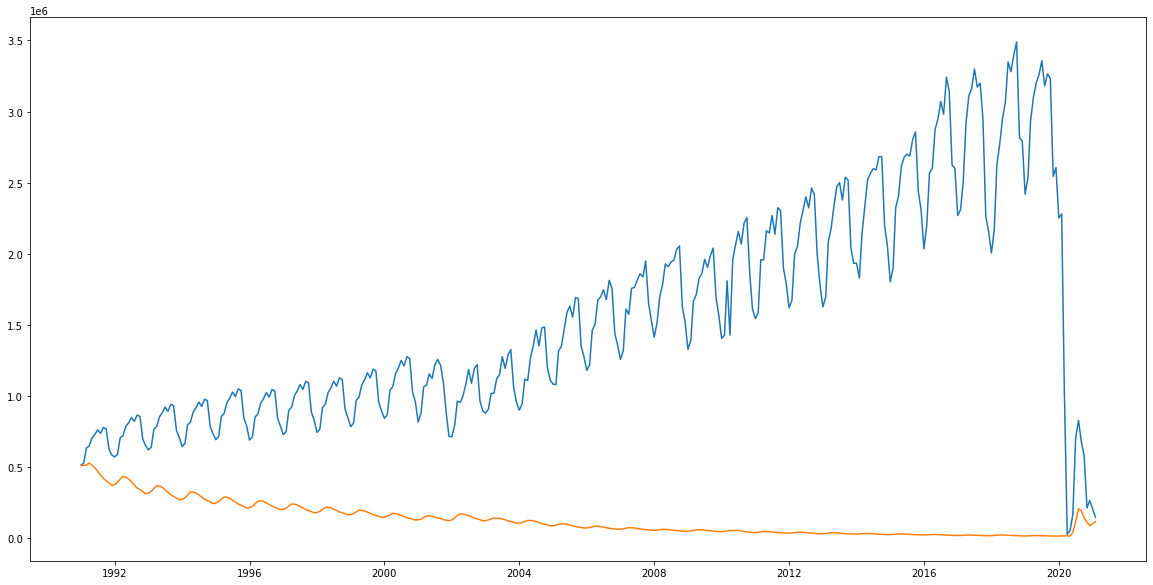

In [26]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)
plt.show()

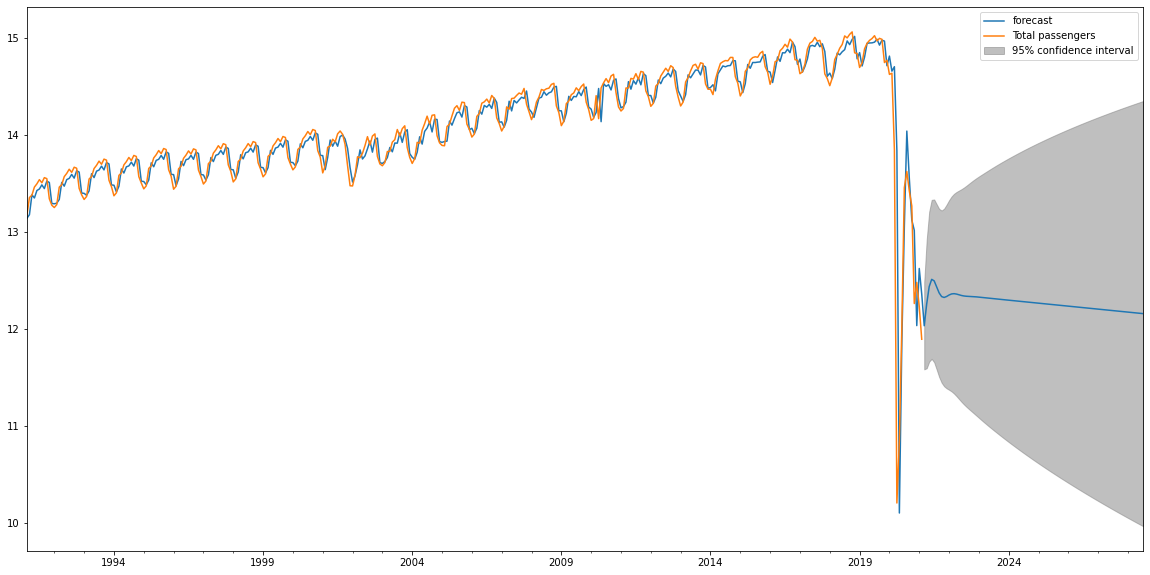

In [27]:
rcParams['figure.figsize']=20,10
results.plot_predict(1,450)
x=results.forecast(steps=1)